**Experiment#3: GB Classification using LASSO FS**


In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import pandas as pd
df= pd.read_csv('/content/gdrive/MyDrive/data/heart_failure_Fsd.csv')


In [ ]:

#Import required libraries
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

from matplotlib.collections import PathCollection
from statsmodels.graphics.gofplots import qqplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier
from yellowbrick.classifier import PrecisionRecallCurve, ROCAUC, ConfusionMatrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef
from yellowbrick.style import set_palette
from yellowbrick.model_selection import LearningCurve, FeatureImportances
from yellowbrick.contrib.wrapper import wrap

# --- Libraries Settings ---

sns.set_style('whitegrid')
plt.rcParams['figure.dpi']=100

In [ ]:
df1 = df.copy()
df1.head()

,TIME,Event,Gender,Smoking,Diabetes,BP,Anaemia,Age,Ejection.Fraction,Sodium,Creatinine,Pletelets,CPK
0,97,0,0,0,0,0,1,43.0,50,135,1.30,237000.00,358
1,180,0,1,1,1,0,1,73.0,30,142,1.18,160000.00,231
2,31,1,1,1,0,1,0,70.0,20,134,1.83,263358.03,582
3,87,0,1,0,0,0,1,65.0,25,141,1.10,298000.00,305
4,113,0,1,0,0,0,0,64.0,60,137,1.00,242000.00,1610


In [ ]:
new_columns = ['TIME','T','SEX','SMOK','DBT','HBP','ANM','AGE','EF','SS','SC','PLTS','CPK']

df1.columns = new_columns
df1.head()

,TIME,T,SEX,SMOK,DBT,HBP,ANM,AGE,EF,SS,SC,PLTS,CPK
0,97,0,0,0,0,0,1,43.0,50,135,1.30,237000.00,358
1,180,0,1,1,1,0,1,73.0,30,142,1.18,160000.00,231
2,31,1,1,1,0,1,0,70.0,20,134,1.83,263358.03,582
3,87,0,1,0,0,0,1,65.0,25,141,1.10,298000.00,305
4,113,0,1,0,0,0,0,64.0,60,137,1.00,242000.00,1610


In [ ]:
df2= df1.copy()
df3 = df1.copy()

In [ ]:
df1.describe()

,TIME,T,SEX,SMOK,DBT,HBP,ANM,AGE,EF,SS,SC,PLTS,CPK
count,299.000000,299.00000,299.000000,299.00000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000
mean,130.260870,0.32107,0.648829,0.32107,0.418060,0.351171,0.431438,60.833893,38.083612,136.625418,1.39388,263358.029264,581.839465
std,77.614208,0.46767,0.478136,0.46767,0.494067,0.478136,0.496107,11.894809,11.834841,4.412477,1.03451,97804.236869,970.287881
min,4.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,40.000000,14.000000,113.000000,0.50000,25100.000000,23.000000
25%,73.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,51.000000,30.000000,134.000000,0.90000,212500.000000,116.500000
50%,115.000000,0.00000,1.000000,0.00000,0.000000,0.000000,0.000000,60.000000,38.000000,137.000000,1.10000,262000.000000,250.000000
75%,203.000000,1.00000,1.000000,1.00000,1.000000,1.000000,1.000000,70.000000,45.000000,140.000000,1.40000,303500.000000,582.000000
max,285.000000,1.00000,1.000000,1.00000,1.000000,1.000000,1.000000,95.000000,80.000000,148.000000,9.40000,850000.000000,7861.000000


**LASSO Feature Selection Method**

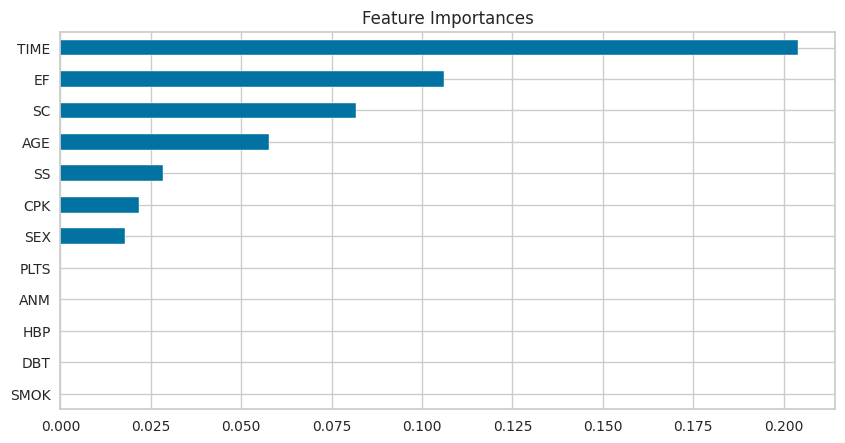

In [ ]:
from sklearn.linear_model import Lasso
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Split the data into input features and output variable
X = df1.drop("T", axis=1)
y = df1["T"]

# Standardize the input features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Fit the Lasso model to the data
lasso = Lasso(alpha=0.01)
lasso.fit(X_std, y)

# Get the feature importance scores
feature_scores = pd.Series(index=X.columns, data=np.abs(lasso.coef_))

# Plot the feature importances
plt.figure(figsize=(10, 5))
feature_scores.sort_values().plot(kind="barh")
plt.title("Feature Importances")
images_dir = '/content/gdrive/MyDrive/data/Images'
plt.savefig(f"{images_dir}/abc.png")
plt.show()

In [ ]:
images_dir = '/content/gdrive/MyDrive/data/Images'
plt.savefig(f"{images_dir}/abc.png")

<Figure size 800x550 with 0 Axes>

In [ ]:
# Sort the features by their score in descending order
sorted_features = feature_scores.sort_values(ascending=False)

# Print the sorted features and their scores
print("Feature importance score:")
print(sorted_features)

Feature importance score:
TIME    0.204062
EF      0.106148
SC      0.081665
AGE     0.057768
SS      0.028278
CPK     0.021860
SEX     0.017823
SMOK    0.000000
DBT     0.000000
HBP     0.000000
ANM     0.000000
PLTS    0.000000
dtype: float64


In [ ]:
# Split the data into input features and output variable
X = df1.drop("T", axis=1)
y = df1["T"]

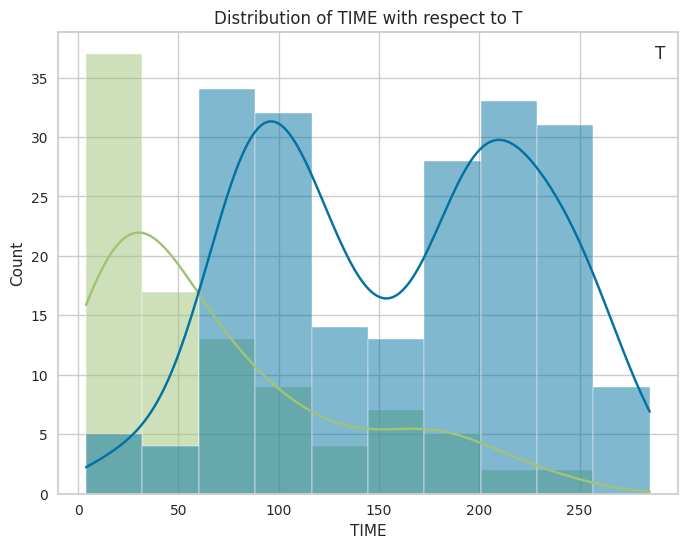

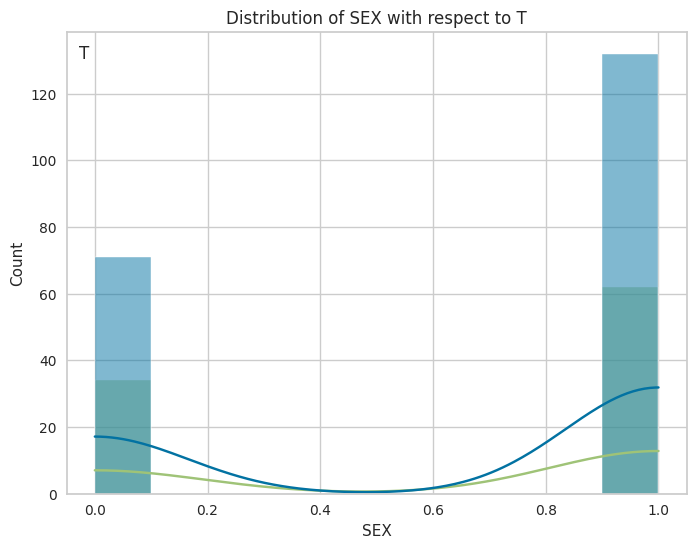

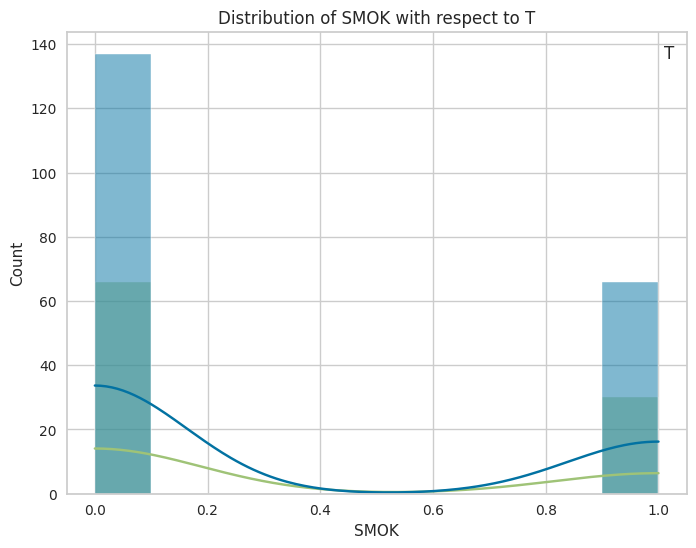

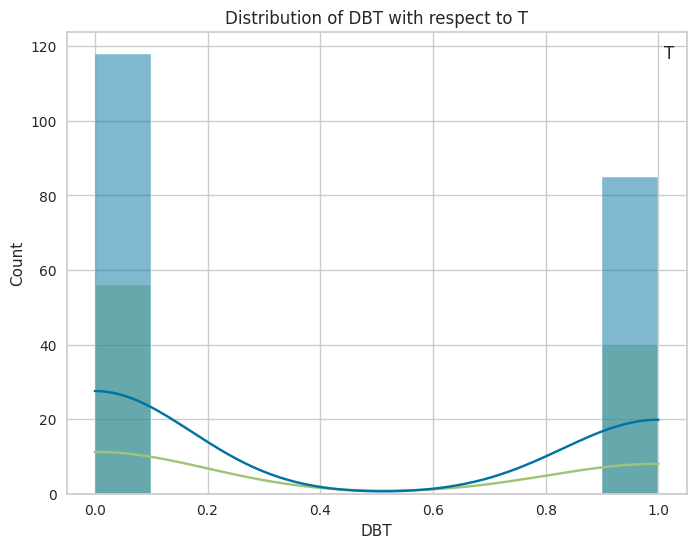

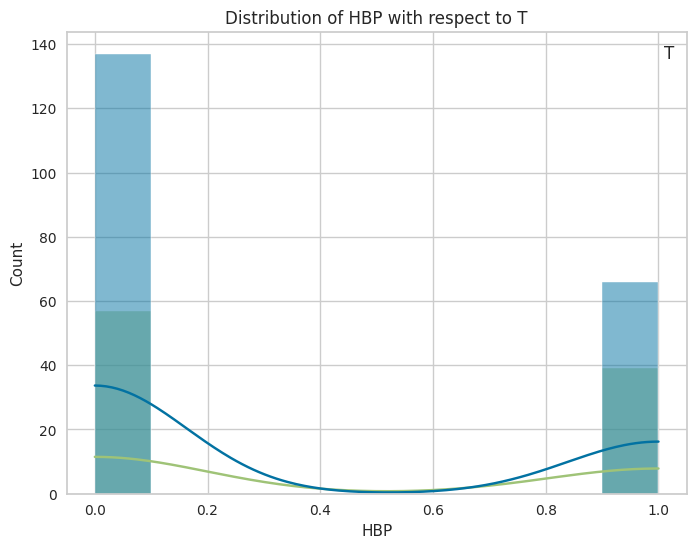

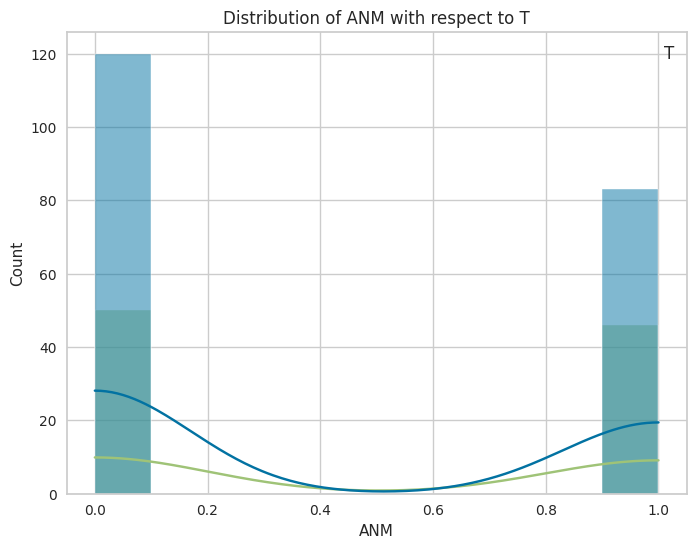

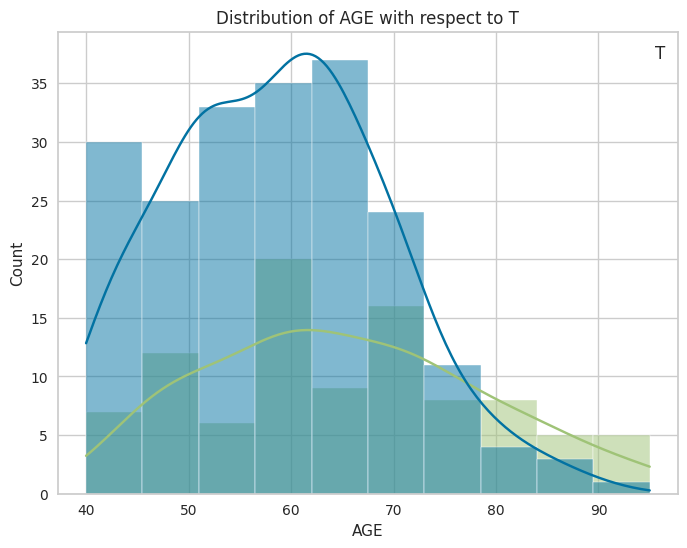

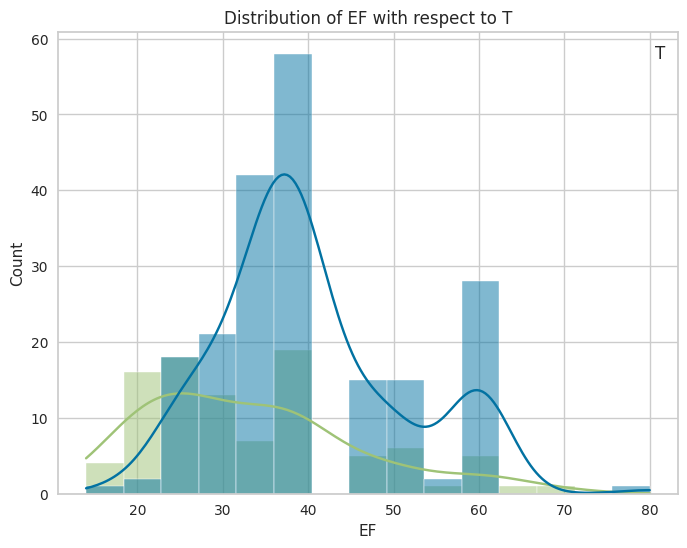

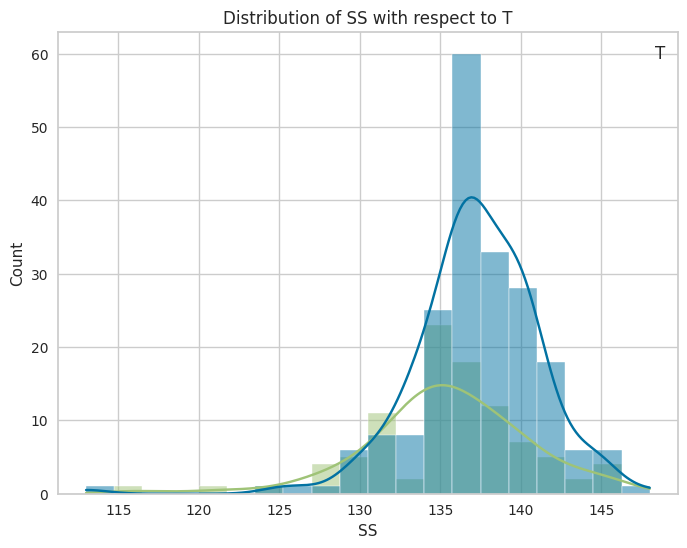

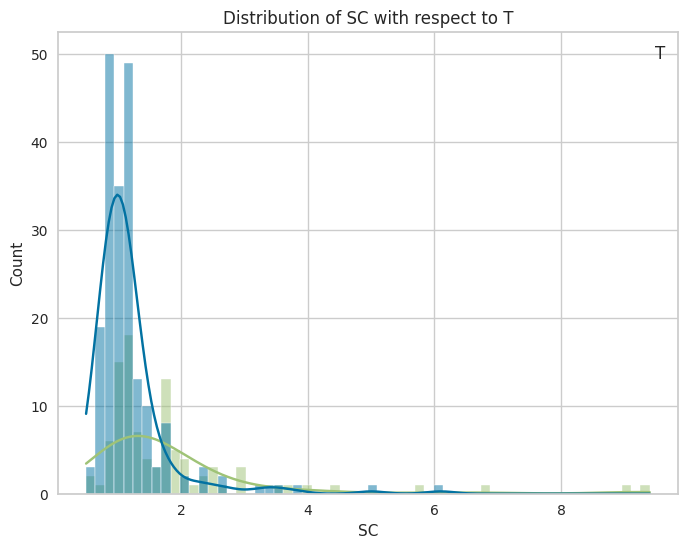

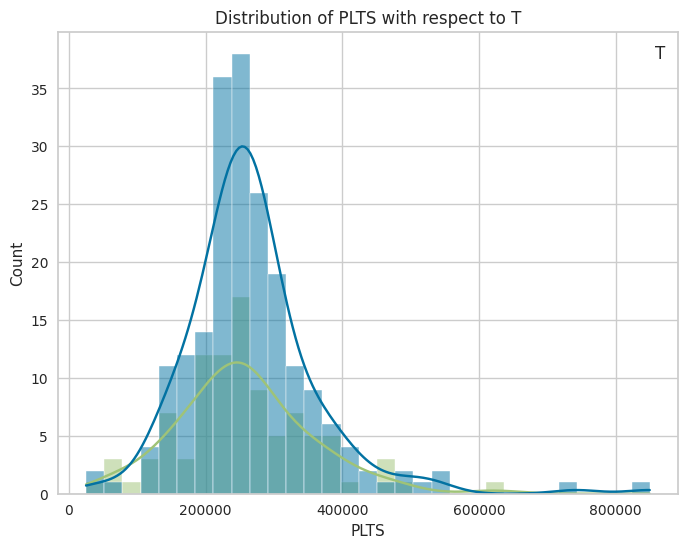

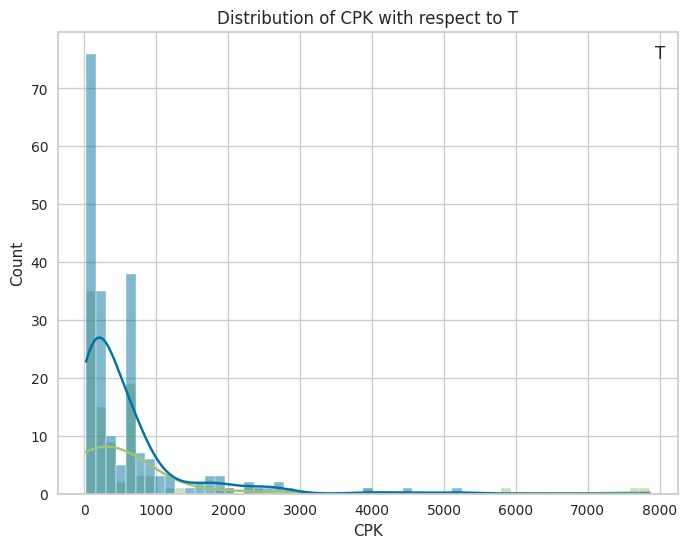

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Concatenate X and y into a single DataFrame
df = pd.concat([X, y], axis=1)

# Plot the distribution of each input feature with respect to the output feature
for feature in X.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=feature, hue="T", kde=True)
    plt.title(f"Distribution of {feature} with respect to T")
    plt.xlabel(feature)
    plt.ylabel("Count")

    # Exclude elements with labels starting with an underscore from the legend
    handles, labels = plt.gca().get_legend_handles_labels()
    filtered_handles = [handle for handle, label in zip(handles, labels) if not label.startswith("_")]
    filtered_labels = [label for label in labels if not label.startswith("_")]

    plt.legend(filtered_handles, filtered_labels, title="T")
    plt.show()


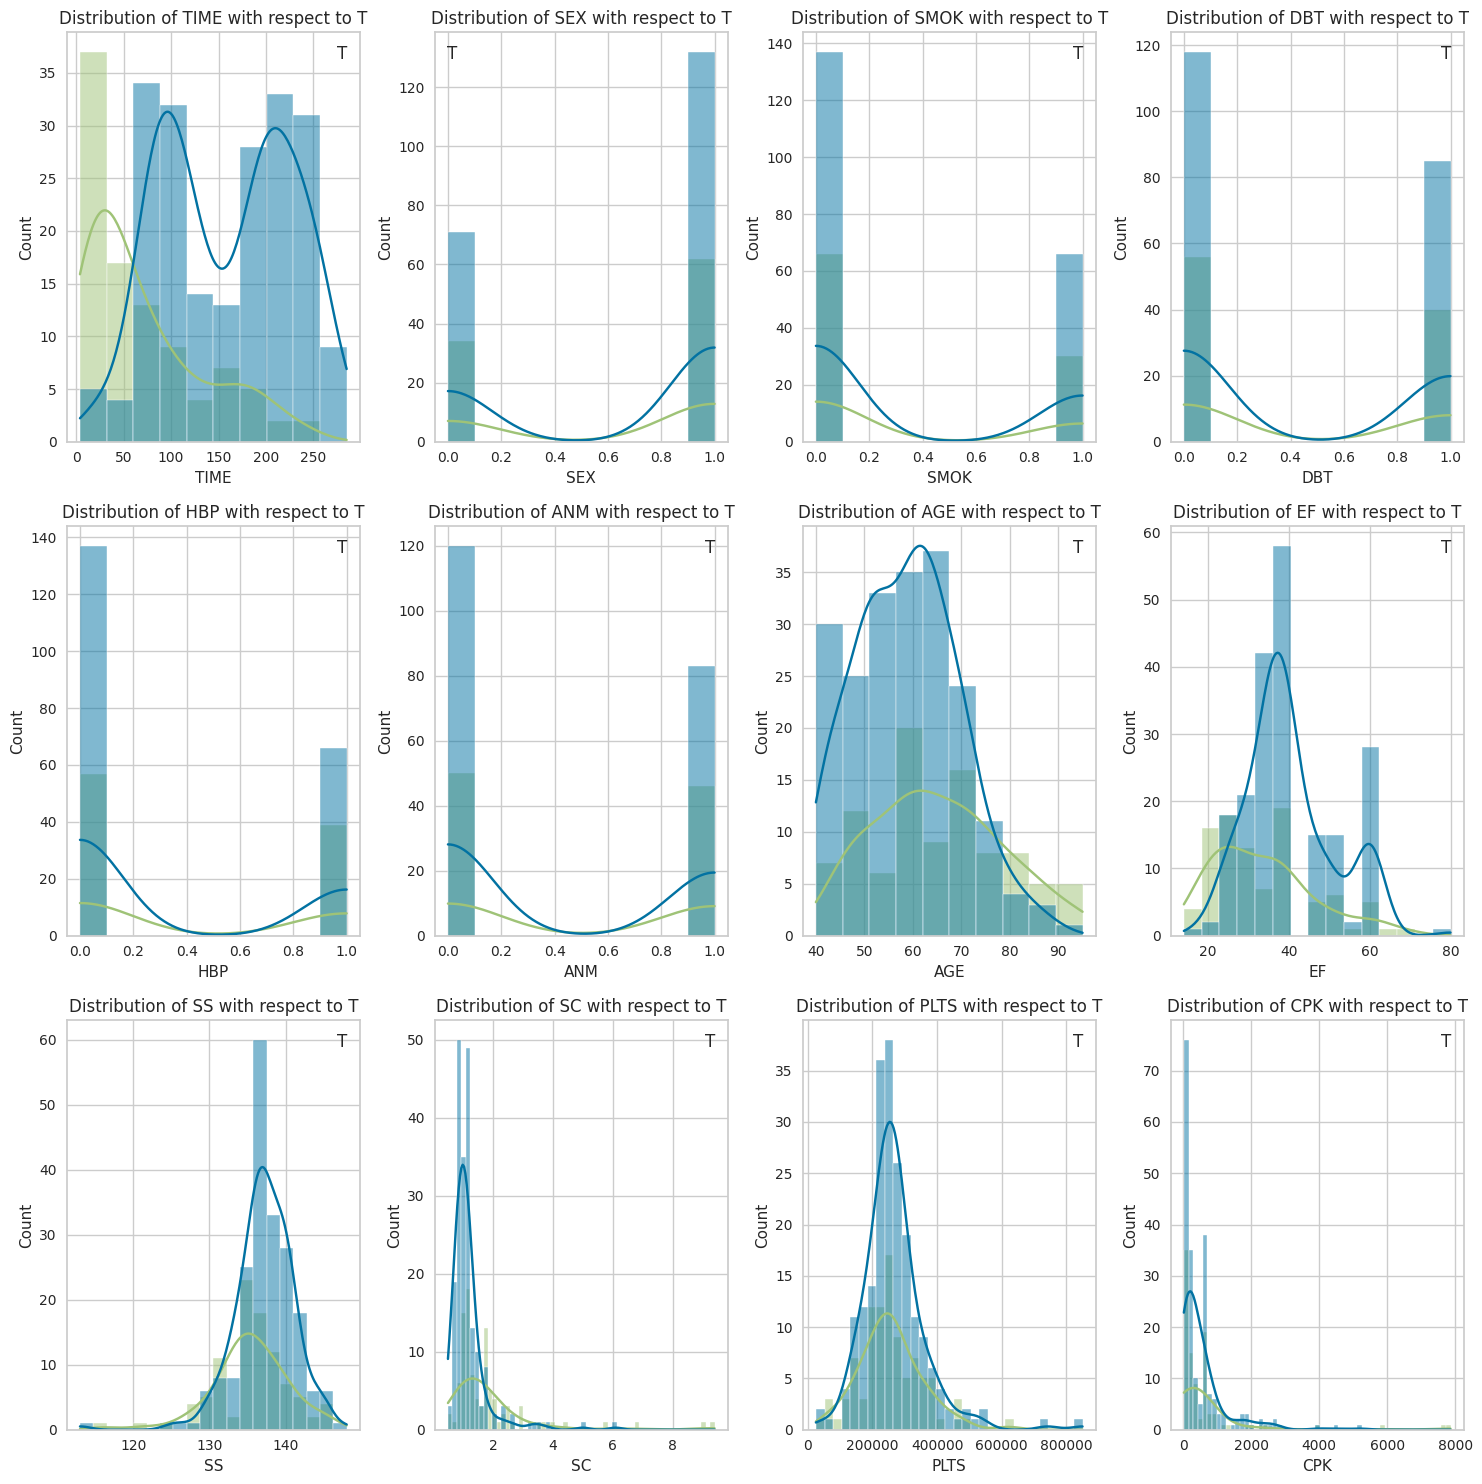

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Concatenate X and y into a single DataFrame
df = pd.concat([X, y], axis=1)

# Determine the number of rows and columns for subplots
num_features = len(X.columns)
num_rows = (num_features + 3) // 4  # Round up to the nearest integer
num_cols = min(num_features, 4)

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# Plot the distribution of each input feature with respect to the output feature
for i, feature in enumerate(X.columns):
    row = i // num_cols
    col = i % num_cols

    sns.histplot(data=df, x=feature, hue="T", kde=True, ax=axes[row, col])
    axes[row, col].set_title(f"Distribution of {feature} with respect to T")
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel("Count")

    # Exclude elements with labels starting with an underscore from the legend
    handles, labels = axes[row, col].get_legend_handles_labels()
    filtered_handles = [handle for handle, label in zip(handles, labels) if not label.startswith("_")]
    filtered_labels = [label for label in labels if not label.startswith("_")]

    axes[row, col].legend(filtered_handles, filtered_labels, title="T")

# Remove any empty subplots
if num_features < num_rows * num_cols:
    for i in range(num_features, num_rows * num_cols):
        fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()


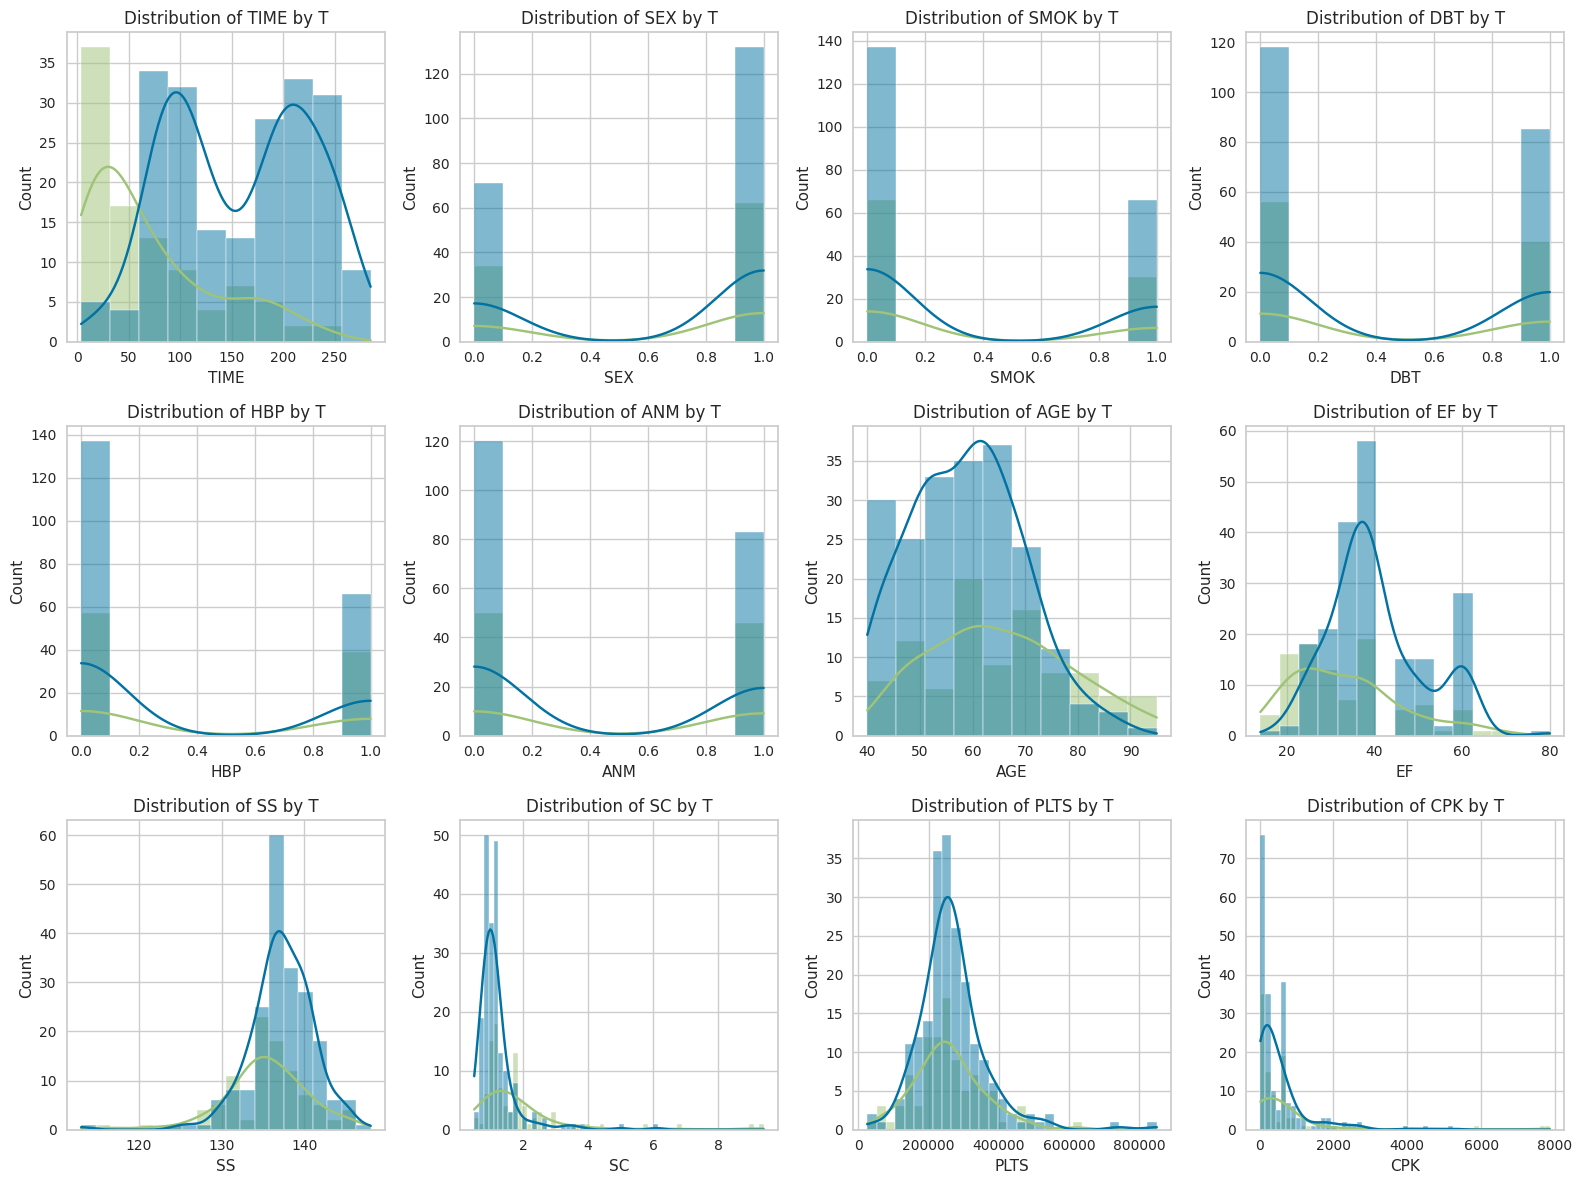

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Loop through the input features and plot their distributions
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 12))
axes = axes.flatten()

for i, feature in enumerate(X.columns):
    ax = axes[i]
    sns.histplot(data=df1, x=feature, hue="T", ax=ax, kde=True, legend=False)
    ax.set_title(f"Distribution of {feature} by T")

# Add a custom legend
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc="lower center", ncol=2)

plt.tight_layout()
plt.show()


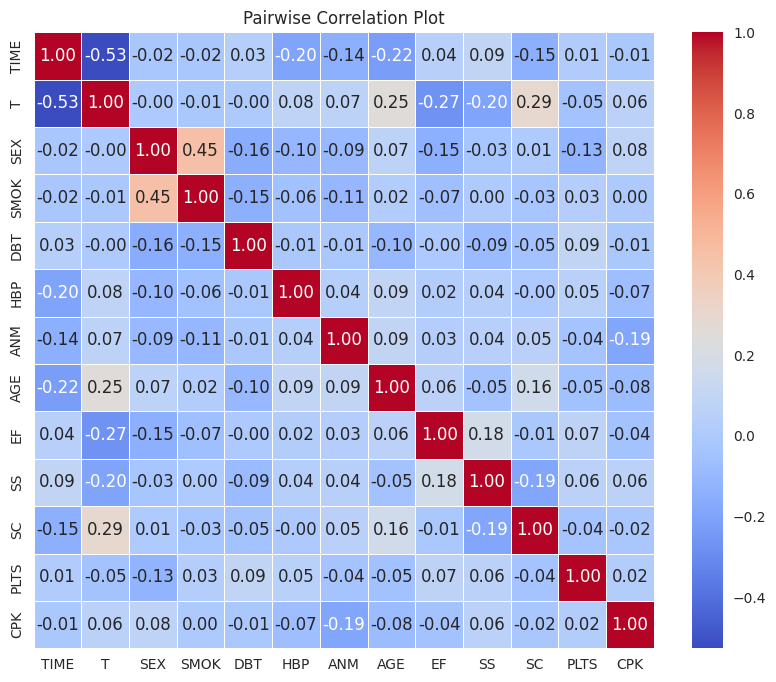

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Compute the pairwise correlation matrix
correlation_matrix = df1.corr()

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Generate the correlation plot
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, ax=ax)

# Set the title of the plot
plt.title('Pairwise Correlation Plot')

# Display the plot
plt.show()


In [ ]:
# --- Drop Unnecessary features ---
X= X.drop(columns = ['PLTS', 'ANM', 'HBP', 'DBT', 'SMOK', 'SEX'])
X.head()

,TIME,AGE,EF,SS,SC,CPK
0,97,43.0,50,135,1.30,358
1,180,73.0,30,142,1.18,231
2,31,70.0,20,134,1.83,582
3,87,65.0,25,141,1.10,305
4,113,64.0,60,137,1.00,1610


In [ ]:
# --- Drop Unnecessary features ---
df3= df3.drop(columns = ['PLTS', 'ANM', 'HBP', 'DBT', 'SMOK', 'SEX'])
df3.head()

,TIME,T,AGE,EF,SS,SC,CPK
0,97,0,43.0,50,135,1.30,358
1,180,0,73.0,30,142,1.18,231
2,31,1,70.0,20,134,1.83,582
3,87,0,65.0,25,141,1.10,305
4,113,0,64.0,60,137,1.00,1610


**outlier**

In [ ]:
import pandas as pd
import numpy as np

# Assuming df2 is your DataFrame with columns 'TIME', 'AGE', 'EF', 'SS', 'SC', 'CPK'

# Calculate z-scores for each column
z_scores = (df3 - df3.mean()) / df3.std()

# Define threshold for considering outliers
threshold = 3  # Adjust this value as needed

# Identify outliers by checking if absolute z-score exceeds the threshold
outliers = (z_scores > threshold) | (z_scores < -threshold)

# Print the outliers for each column
for column in df3.columns:
    column_outliers = df3[outliers[column]][column]
    print(f"Outliers in {column}:")
    print(column_outliers)

# Alternatively, you can create a new DataFrame containing only the outliers
outliers_df = df3[outliers.any(axis=1)]
print("DataFrame with outliers:")
print(outliers_df)


Outliers in TIME:
Series([], Name: TIME, dtype: int64)
Outliers in T:
Series([], Name: T, dtype: int64)
Outliers in AGE:
Series([], Name: AGE, dtype: float64)
Outliers in EF:
275    80
Name: EF, dtype: int64
Outliers in SS:
97     116
104    113
292    121
Name: SS, dtype: int64
Outliers in SC:
37     6.1
82     9.0
84     5.8
86     5.0
146    9.4
228    6.8
Name: SC, dtype: float64
Outliers in CPK:
25     7861
41     7702
105    5882
108    3966
156    4540
201    5209
228    3964
Name: CPK, dtype: int64
DataFrame with outliers:
     TIME  T   AGE  EF   SS    SC   CPK
25      6  1  55.0  38  136  1.10  7861
37    107  0  60.0  45  131  6.10  1082
41     60  1  45.0  25  139  1.00  7702
82    196  1  54.0  70  137  9.00   427
84     26  1  58.0  38  134  5.80    60
86    207  0  65.0  25  130  5.00    56
97      8  1  65.0  20  116  2.70   160
104   186  0  60.0  35  113  1.80  1211
105    72  1  85.0  35  132  1.00  5882
108   146  0  52.0  40  140  0.90  3966
146    10  1  80.0  35 

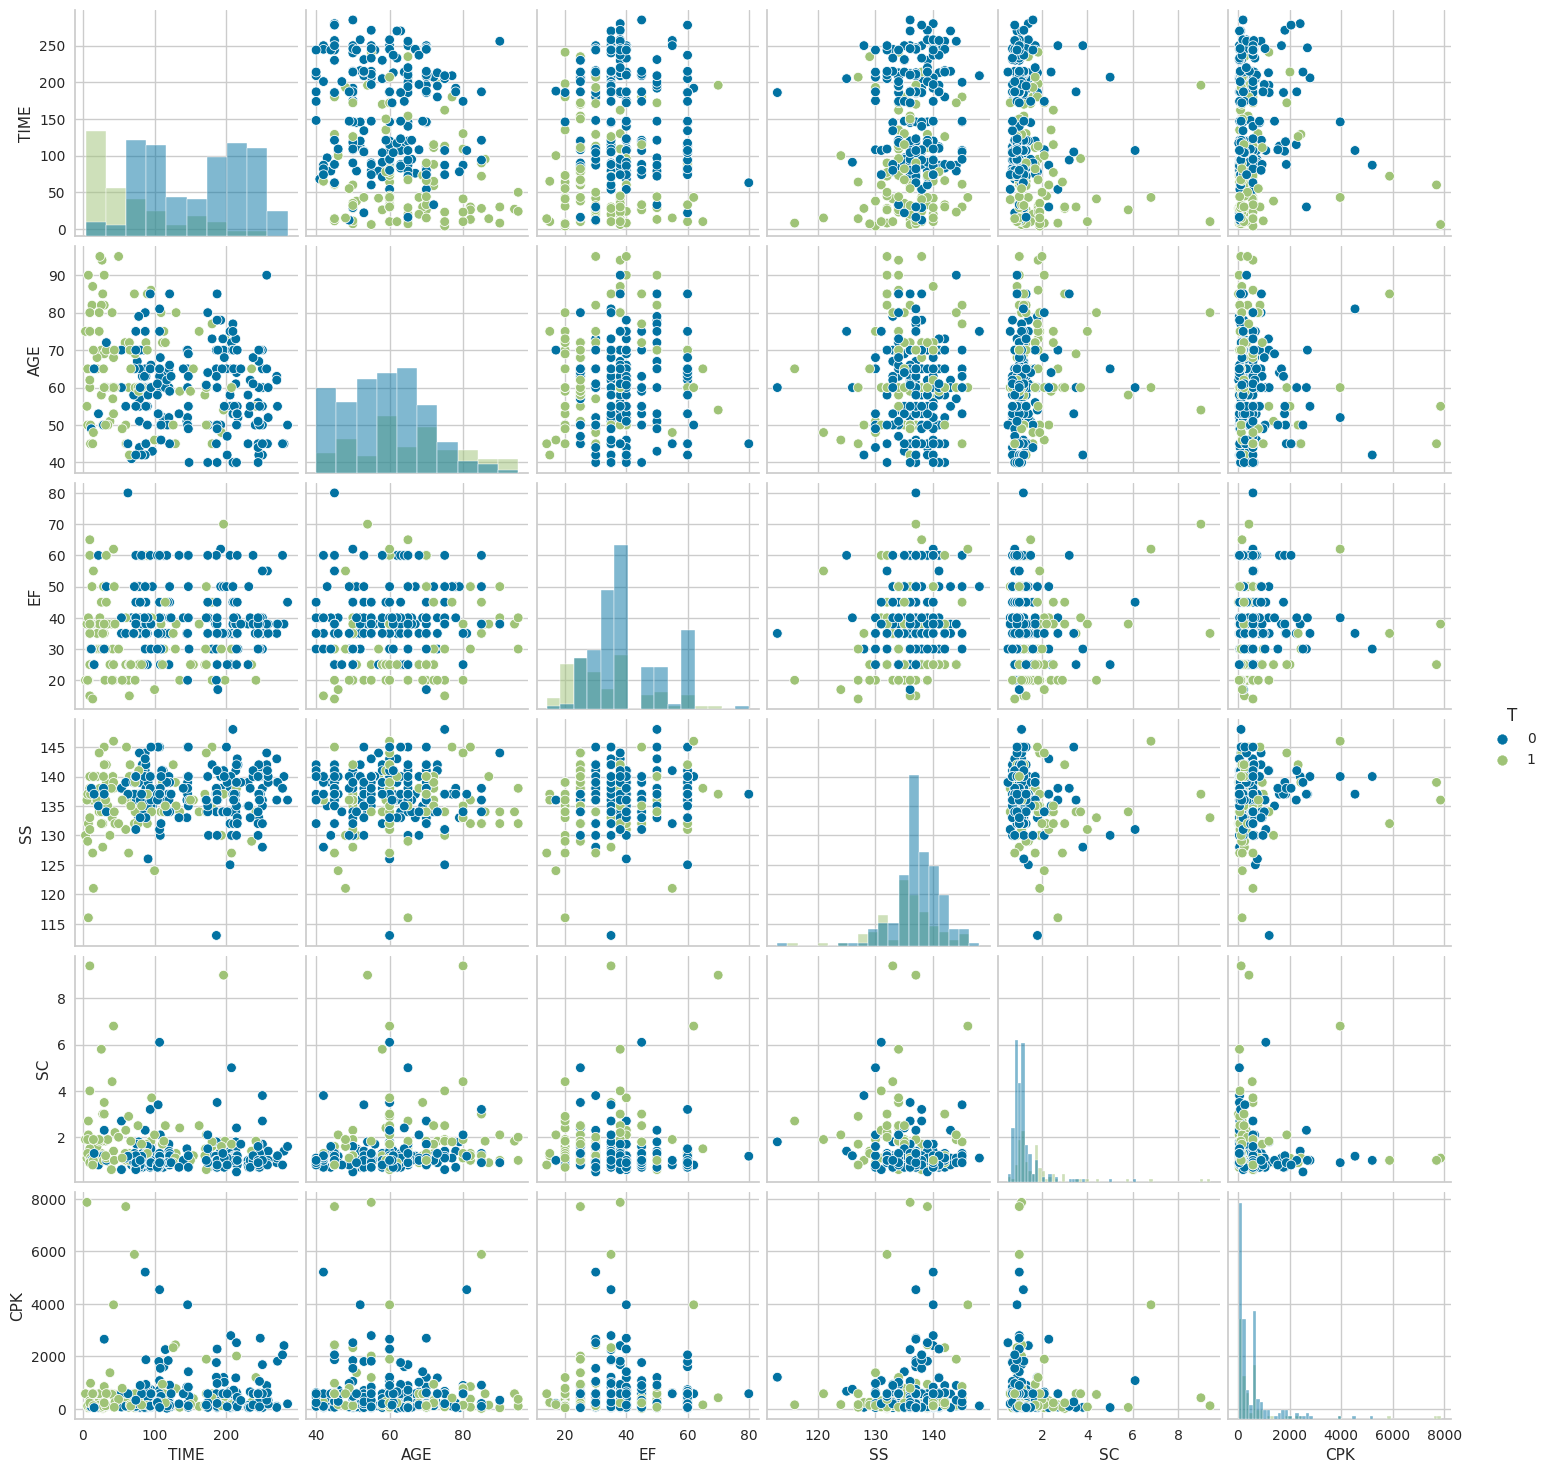

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

# Assuming you have already defined and loaded the DataFrame df2
# df2.columns = ['TIME', 'AGE', 'EF', 'SS', 'SC', 'CPK']
# df2['T'] = df2.target

# Create pairplot of all the variables with hue set to 'T' (target)
sns.pairplot(df2, hue='T', vars=['TIME', 'AGE', 'EF', 'SS', 'SC', 'CPK'], diag_kind='hist')

# Display the plot
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
X = MinMaxScaler().fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

**Gradient Boost with default parameters**

In [ ]:
# --- Applying Gradient Boosting ---
classifierGB = GradientBoostingClassifier()

classifierGB.fit(x_train, y_train)
GBy_pred = classifierGB.predict(x_test)
# Calculate accuracy
acGB = accuracy_score(y_test, GBy_pred)
precisionGB = precision_score(y_test, GBy_pred)
recallGB = recall_score(y_test, GBy_pred)
f1GB = f1_score(y_test, GBy_pred)
auc_rocGB = roc_auc_score(y_test, GBy_pred)

print("Accuracy of GB:", acGB)
print("Precision of GB:", precisionGB)
print("Recall of GB:", recallGB)
print("F1-score of GB:", f1GB)
print("AUC-ROC of GB:", auc_rocGB)

# Calculate MCC
mccGB = matthews_corrcoef(y_test, GBy_pred)
print("MCC of GB:", mccGB)

# Calculate prediction time
import time
start_time = time.time()

p_timeGB = time.time() - start_time
print("Prediction Time:", p_timeGB)

Accuracy of GB: 0.9166666666666666
Precision of GB: 1.0
Recall of GB: 0.7222222222222222
F1-score of GB: 0.8387096774193548
AUC-ROC of GB: 0.8611111111111112
MCC of GB: 0.8033617310539418
Prediction Time: 4.267692565917969e-05


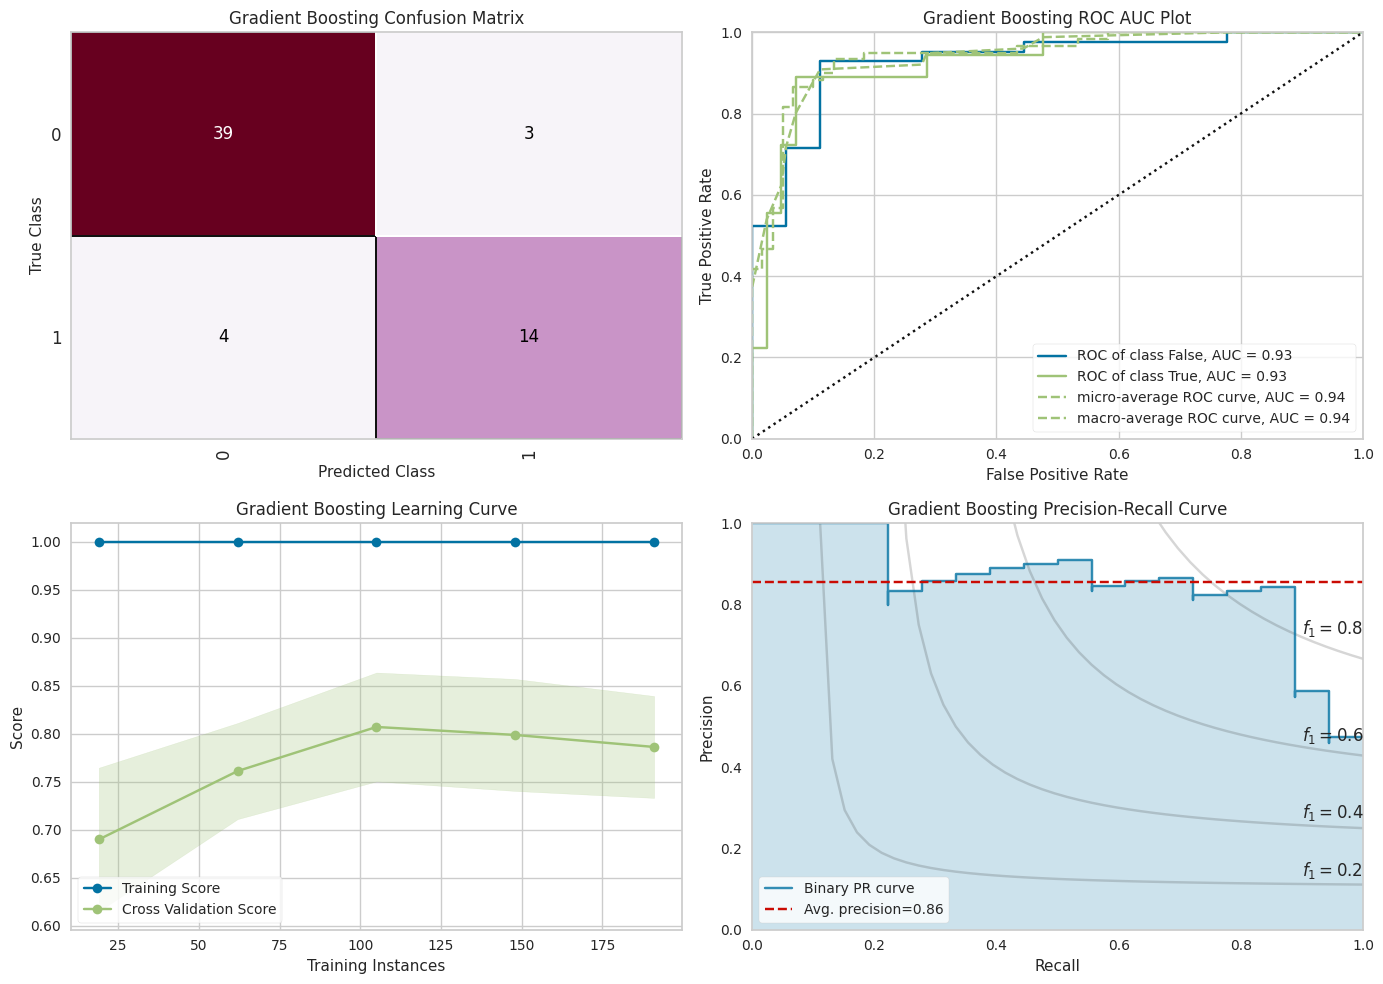

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

# --- Gradient Boosting Confusion Matrix ---
gbcmatrix = ConfusionMatrix(classifierGB, ax=ax1, cmap='PuRd',
                            title='Gradient Boosting Confusion Matrix')
gbcmatrix.fit(x_train, y_train)
gbcmatrix.score(x_test, y_test)
gbcmatrix.finalize()

# --- Gradient Boosting ROC AUC ---
gbcrocauc = ROCAUC(classifierGB, classes=['False', 'True'], ax=ax2,
                   title='Gradient Boosting ROC AUC Plot')
gbcrocauc.fit(x_train, y_train)
gbcrocauc.score(x_test, y_test)
gbcrocauc.finalize()

# --- Gradient Boosting Learning Curve ---
gbclc = LearningCurve(classifierGB, ax=ax3, title='Gradient Boosting Learning Curve')
gbclc.fit(x_train, y_train)
gbclc.finalize()

# --- Gradient Boosting Precision Recall Curve ---
gbcurve = PrecisionRecallCurve(classifierGB, ax=ax4, ap_score=True, iso_f1_curves=True,
                                title='Gradient Boosting Precision-Recall Curve')
gbcurve.fit(x_train, y_train)
gbcurve.score(x_test, y_test)
gbcurve.finalize()

plt.tight_layout();